# Assignment-2 COMP-5630 Jacob Murrah
## README
This notebook implements a two-layer neural network for regression using backpropagation with mean square error loss and a sigmoid hidden layer. It derives the update rule, contrasts it with binary classification using log loss, and explores network design choices—including output activation, learning rate, hidden layer size, and regularization techniques—through systematic experiments and visualizations.

## Dependencies
- **Python 3.x**
- **pandas**
- **numpy**
- **matplotlib**
- **sklearn**

*Note: If you are running this notebook in Google Colab, all the required packages are pre-installed.*

## Instructions
1. **Run All Cells:** Please click on \"Runtime\" > \"Run all\" to execute the entire notebook sequentially.
2. **Review the Outputs:** The notebook is organized into several sections. Ensure that all cells run without errors.


## Question 1
Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for regression using the Mean Square Error loss. Assume that you are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.
<br><br>
**a) Derive the update rule.**<br>
Answer: I will derive a an update rule for W<sup>(1)</sup>. Note that other derivations will need to be made for other weights and biases. The steps for the other weights and biases will follow the same process as below. This same process would be used to derive a general equation.
$$L = \frac{1}{2} (\hat{y} - y)^2$$
<br>
$$a^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$$
<br>
$$z^i = W^{(i)}a^{(i-1)} + b^{(i)}$$
<br>
$$\frac{dL}{dW^{(1)}} = \frac{dL}{dz^{(2)}} \cdot \frac{dz^{(2)}}{da^{(1)}} \cdot \frac{da^{(1)}}{dz^{(1)}} \cdot \frac{dz^{(1)}}{dW^{(1)}}$$
***
$$\frac{dz^{(1)}}{dW^{(1)}} = x$$
<br>
$$\frac{da^{(1)}}{dz^{(1)}} = a^{(1)}(1 - a^{(1)})$$
<br>
$$\frac{dz^{(2)}}{da^{(1)}} = W^{(2)}$$
<br>
$$\frac{dL}{dz^{(2)}} = z^{(2)} - y$$
<br>
$$\frac{dL}{dW^{(1)}} = (z^{(2)} - y) \cdot W^{(2)} \cdot a^{(1)}(1 - a^{(1)}) \cdot x$$
<br>
$$
\frac{\partial L}{\partial W^{(1)}} = \left((W^{(2)})^T (z^{(2)} - y) \odot a^{(1)} \odot (1 - a^{(1)})\right) x^T.
$$
<br>
**b) How to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for regression using the Mean Square Error loss.**<br>
Answer: Training a neural network with backpropagation will involve using gradient descent to determine the values of the weights and biases.
1.   Before training initialize the weights and biases to a random number.
2.   For each training data point compute the output of the neural network with the current weights and biases.
3.   Calculate the MSE by summing the squared difference between the neural network's output and the actual value and then averaging the summation.
4.   Use backpropagation to calculate the gradients with respect to the weights and biases in the neural network.
5.   Update the weights and biases by using gradient descent.
6.   Repeat these steps until convergence or the max number of iterations is reached.
<br>
<br>
**c) Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.**<br>
Answer: The main difference between the update rule derived above and the update rule for a neural network trained for binary classification using log loss is how the gradient is calculated at the output layer. More specifically, in binary classification, the log loss simiplifies the gradient calculation by removing the multiplication of the sigmoid function derivative. In binary classification we have two possible classes and our output will be a probability that the input belongs to a specific class. For regression with an MSE update rule we have a numeric output instead of a probability. As a result the binary classification using log loss leads makes training more stable and more efficient.

## Question 2
For the given data on canvas, construct a neural network for the regression task. Your network must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the hidden layer(s). You can choose the number of neurons in each layer using your intuition. The data is already split to have your input data for training (X_train.csv) and testing (X_test.csv) and
their corresponding target values Y_train.csv and Y_test.csv, respectively. You can load the data using
NumPy as follows:
X_train = np.loadtxt("X_train.csv")
Implement the backpropagation algorithm and train your network until convergence.

In [739]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [740]:
X_train, Y_train = np.loadtxt("X_train.csv"), np.loadtxt("Y_train.csv")
X_test, Y_test = np.loadtxt("X_test.csv"), np.loadtxt("Y_test.csv")

print(Y_train[:20])

[-40.22844192 121.19952851 144.96172544 -53.60851723 -80.78260693
  71.86365061  71.466062   -33.32518392  59.76170064 -17.71062849
 -65.76873197  62.63940132 147.20992237 -11.80277218  43.96258946
 -62.87310611  34.48496287 -50.94208323 -84.97715046  36.84815967]


**1) What is the activation function that you will choose for the output layer Justify your answer briefly.**<br>
Answer: I will use a linear activation function for my output layer because the output values have continuous values that span a large range of positive and negative numbers.

**2) How many neurons should there be in the output layer? Why?**<br>
Answer: There will be a single (1) neuron in the ouput layer. There is only one neuron because the Y_train data has single float output expected for the input data.

In [741]:
def linear(x):
  return x

def linear_derivative(x):
  return np.ones_like(x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1 - s)

def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
  return (x > 0).astype(float)

def plot(x, y, x_label, y_label, plot_label, title, log_scale=False):
  plt.plot(x, y, label=plot_label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  if log_scale:
    plt.xscale('log')
    plt.xticks(learning_rates, learning_rates)

  plt.legend()
  plt.grid(True)
  return plt

In [742]:
class NeuralNetwork:
  def __init__(self, X, y, layers, learning_rate):
    y.ravel()
    self.X_train = X.T
    self.Y_train = y.reshape(layers[-1], len(y))
    self.learning_rate = learning_rate
    self.weights = []
    self.biases = []
    self.m = len(y)

    for i in range(len(layers) - 1):
      self.weights.append(
        np.random.randn(layers[i + 1], layers[i]) * np.sqrt(1/layers[i])
      )
      self.biases.append(np.random.randn(layers[i + 1], 1))

  def mse(self, actual, predicted):
      return np.mean((actual - predicted) ** 2)

  def feed_forward(self, activation_function):
    a_cache = [self.X_train]
    z_cache = []

    A = a_cache[0]
    len_w = len(self.weights)

    for i in range(len_w):
      Z = self.weights[i] @ A + self.biases[i]
      z_cache.append(Z)
      A = activation_function(Z) if i < len_w - 1 else linear(Z)
      a_cache.append(A)

    return A, (z_cache, a_cache)

  def forward_pass_data(self, X, activation_function):
    X_data = X.T
    a_cache = [X_data]
    z_cache = []

    A = a_cache[0]
    len_w = len(self.weights)

    for i in range(len_w):
      Z = self.weights[i] @ A + self.biases[i]
      z_cache.append(Z)
      A = activation_function(Z) if i < len_w - 1 else linear(Z)
      a_cache.append(A)

    return A, (z_cache, a_cache)

  def backpropagation(self, cache, activation_derivative):
    z_cache, a_cache = cache

    len_w = len(self.weights)
    gradient_weights = [None] * len_w
    gradient_biases = [None] * len_w

    A_L, Z_L = a_cache[-1], z_cache[-1]
    dL_dA = (2 / self.m) * (A_L - self.Y_train)
    delta = dL_dA * linear_derivative(Z_L)

    for l in range(len_w-1, -1, -1):
      gradient_weights[l] = delta @ a_cache[l].T
      gradient_biases[l] = np.sum(delta, axis=1, keepdims=True)
      if l > 0:
        delta = (
          (self.weights[l].T @ delta) * activation_derivative(z_cache[l-1])
        )

    return gradient_weights, gradient_biases

  def gradient_descent(
    self,
    activation_function,
    activation_derivative,
    X_val=None,
    Y_val=None,
    patience=5,
    lambda_reg=0.0
  ):
    mse_losses, validation_losses, last_y = [], [], None

    best_val_loss = float('inf')
    patience_counter = 0
    best_weights = best_biases = None

    for i in range(1000):
      y_hat, cache = self.feed_forward(activation_function)
      last_y = y_hat

      mse = self.mse(self.Y_train, y_hat)
      mse_losses.append(mse)

      if X_val is not None and Y_val is not None:
        Y_val_reshaped = Y_val.reshape(self.Y_train.shape[0], Y_val.shape[0])
        val_y_hat, _ = self.forward_pass_data(X_val, activation_function)
        val_mse = self.mse(Y_val_reshaped, val_y_hat)
        validation_losses.append(val_mse)

        if val_mse < best_val_loss:
          best_val_loss = val_mse
          patience_counter = 0
          best_weights = [w.copy() for w in self.weights]
          best_biases = [b.copy() for b in self.biases]
        else:
          patience_counter += 1
          if patience_counter >= patience:
            self.weights = best_weights
            self.biases = best_biases
            break

      weight_gradients, bias_gradients = self.backpropagation(
        cache, activation_derivative
      )

      for j in range(len(self.weights)):
        if lambda_reg > 0: # L2 regularization
          weight_gradients[j] += lambda_reg * self.weights[j]
        self.weights[j] -= weight_gradients[j] * self.learning_rate
        self.biases[j] -= bias_gradients[j] * self.learning_rate

    return mse_losses, validation_losses, last_y



In [743]:
nn = NeuralNetwork(X_train, Y_train, [2, 10, 1], 0.001)
mse_losses, _, _ = nn.gradient_descent(
  sigmoid, sigmoid_derivative
)

sum_mse, len_mse = sum(mse_losses), len(mse_losses)
avg_mse = sum_mse / len_mse
print(f"Sigmoid AVG MSE: {sum_mse:.2f} / {len_mse} = {avg_mse}")

Sigmoid AVG MSE: 1562644.69 / 1000 = 1562.6446892442566


**3) Report on the average MSE loss.**<br>
Answer: The average MSE loss is found by summing the all of the MSE losses and dividing by the number of MSE losses. Since the initial values of the weights and biases are random the initial MSE values are very large and then they start to decrease and converge towards zero. Without early stopping the AVG MSE will continue to decrease as the number of iterations increase because the MSE values converge to 0 after some time. AVG MSE is not a very good metric for the viability of a model due to the randomness of the starting values and since the MSE values will converge to 0.


**4) Plot the loss as a function of the number of iterations.**

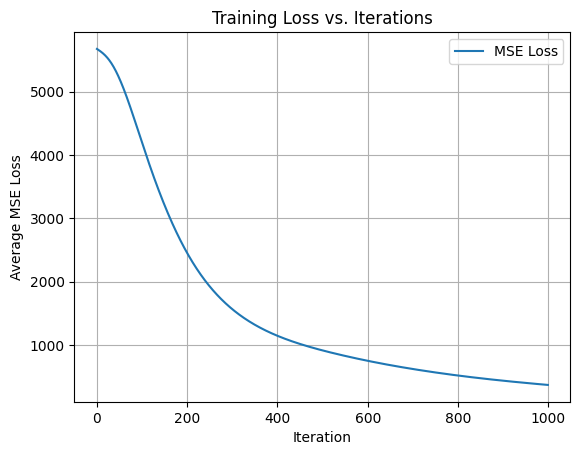

In [744]:
plot(
  range(len(mse_losses)),
  mse_losses,
  x_label="Iteration",
  y_label="Average MSE Loss",
  plot_label="MSE Loss",
  title="Training Loss vs. Iterations"
).show()

**5) What is the eﬀect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.**<br>
Answer: The learning rate is the number that determines the step size during each iteration of gradient descent. A small learning rate will take small steps and thus cause the algorithm to take longer to converge. A large learning rate will cause each step to be very large which increases the risk of exploding gradients and potentially never converge. The plot below shows that learning rates less than or equal to 0.01 converging to zero and the learning rates above 0.01 having the problem of exploding gradients.

<ipython-input-741-530b5ee8ad10>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-742-20cb6dd4960c>:18: RuntimeWarning: overflow encountered in square
  return np.mean((actual - predicted) ** 2)
<ipython-input-742-20cb6dd4960c>:67: RuntimeWarning: overflow encountered in matmul
  (self.weights[l].T @ delta) * activation_derivative(z_cache[l-1])
<ipython-input-742-20cb6dd4960c>:67: RuntimeWarning: invalid value encountered in multiply
  (self.weights[l].T @ delta) * activation_derivative(z_cache[l-1])


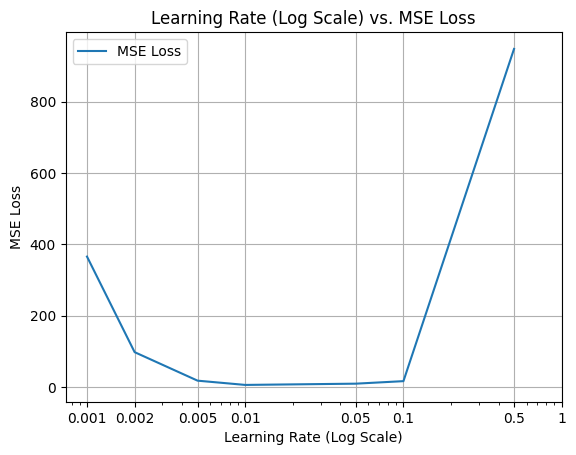

In [745]:
learning_rates = [
    0.001,
    0.002,
    0.005,
    0.01,
    0.05,
    0.1,
    0.5,
    1
]
lr_mse_losses = []
for i, lr in enumerate(learning_rates):
  network = NeuralNetwork(X_train, Y_train, [2, 10, 1], lr)
  mse_losses, _, _ = network.gradient_descent(
    sigmoid, sigmoid_derivative
  )
  lr_mse_losses.append(mse_losses[-1])

plot(
  learning_rates,
  lr_mse_losses,
  x_label="Learning Rate (Log Scale)",
  y_label="MSE Loss",
  plot_label="MSE Loss",
  title="Learning Rate (Log Scale) vs. MSE Loss",
  log_scale=True
).show()

**6) What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:**<br>



**6a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?**
Answer: The update rule does NOT need to be changed/derived again. Our backpropagation algorithm uses matrix operations that accomodate different dimensions. We can easily change th number of neurons in a network because the chain rule makes the dimensions working themselves out. The individual gradient calculations will always be the same no matter what the dimensions or the network are.

**6b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**<br>
Answer: As the number of neurons increase the loss of the model decreases. This means that the model accuracy on the training data is improving! Since predeicted values and actual values are very close the predicted vs actual values are linear. We need to be mindful of overfitting as we add more neurons.

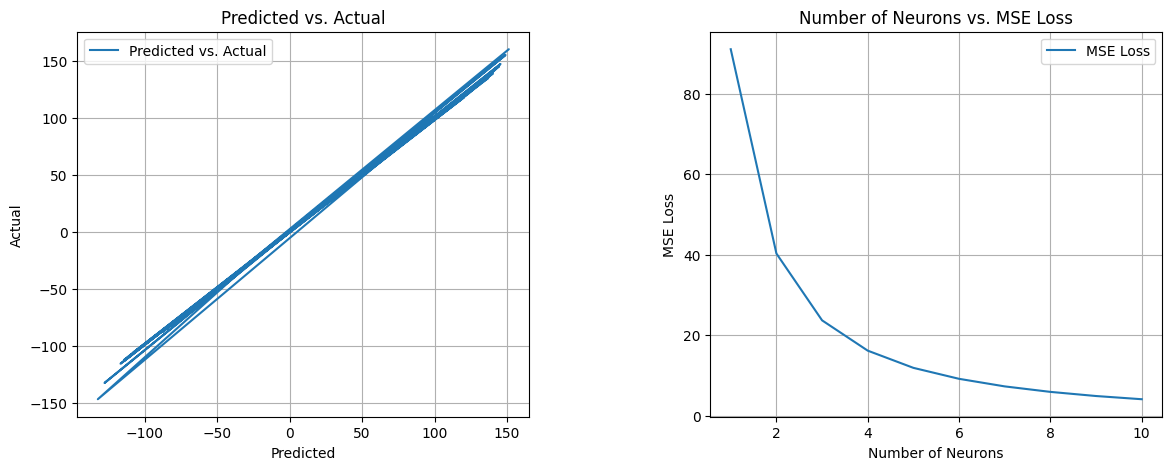

In [746]:
plt.figure(figsize=(14, 5))
gs = GridSpec(1, 2, figure=plt.gcf(), wspace=0.4)

neuron_losses = []
for num_neurons in range(1, 11):
  network = NeuralNetwork(X_train, Y_train, [2, num_neurons, 1], 0.001)
  mse_losses, _, y_pred = nn.gradient_descent(
    sigmoid, sigmoid_derivative
  )
  neuron_losses.append(mse_losses[-1])
  if num_neurons == 10:
    plt.subplot(gs[0, 0])
    plt.cla()
    act_vs_pred = plot(
      y_pred.flatten(),
      Y_train,
      x_label="Predicted",
      y_label="Actual",
      plot_label="Predicted vs. Actual",
      title="Predicted vs. Actual",
    )

plt.subplot(gs[0, 1])
plt.cla()
neur_vs_mse = plot(
  range(1, len(neuron_losses) + 1),
  neuron_losses,
  x_label="Number of Neurons",
  y_label="MSE Loss",
  plot_label="MSE Loss",
  title="Number of Neurons vs. MSE Loss",
)

plt.show()

**6 CONTINUED...) What is the effect of the number of neurons in the hidden layer?**<br>
Answer: When there are less neurons the model is not able to fully capture the relationship of the data and there is more inaccuracy. As we increase the number of neurons the training loss decreases as we are more accurately modeling the training data. If we have too few neurons the network may be underfit and too many neurons may cause overfitting. It is important that we balance the number of neurons to create a model that can generalize well to unseen data.

**7) What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.**

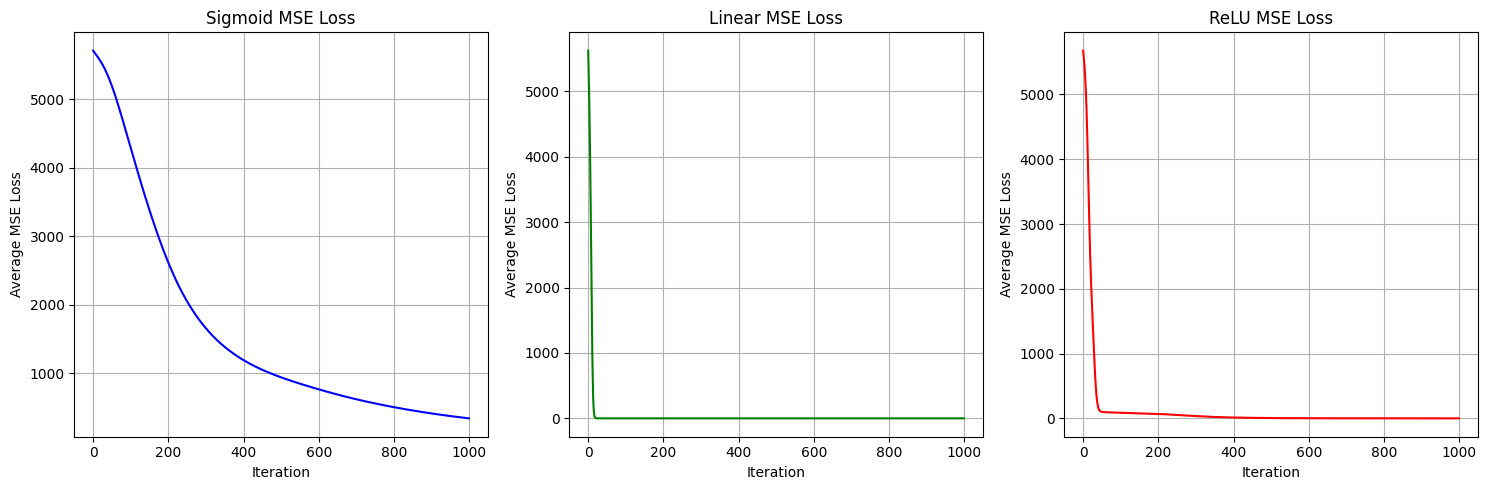

In [747]:
sig_nn = NeuralNetwork(X_train, Y_train, [2, 10, 1], 0.001)
sig_mse_losses, _, _ = sig_nn.gradient_descent(sigmoid, sigmoid_derivative)

lin_nn = NeuralNetwork(X_train, Y_train, [2, 10, 1], 0.001)
lin_mse_losses, _, _ = lin_nn.gradient_descent(linear, linear_derivative)

relu_nn = NeuralNetwork(X_train, Y_train, [2, 10, 1], 0.001)
relu_mse_losses, _, _ = relu_nn.gradient_descent(relu, relu_derivative)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(range(len(sig_mse_losses)), sig_mse_losses, color='blue')
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Average MSE Loss")
axes[0].set_title("Sigmoid MSE Loss")
axes[0].grid(True)

axes[1].plot(range(len(lin_mse_losses)), lin_mse_losses, color='green')
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Average MSE Loss")
axes[1].set_title("Linear MSE Loss")
axes[1].grid(True)

axes[2].plot(range(len(relu_mse_losses)), relu_mse_losses, color='red')
axes[2].set_xlabel("Iteration")
axes[2].set_ylabel("Average MSE Loss")
axes[2].set_title("ReLU MSE Loss")
axes[2].grid(True)

plt.tight_layout()
plt.show()

**7a. Will you need to change the update rule?**<br>
Answer: No, the update rule does not change. However, the gradient function calculation does change because it depends on the derivative of our activation function. I have made the class so that you simply pass in the correct activation derivative when performing backpropagation.
**7b. What is the change that you need to make to achieve this experiment?**<br>
Answer: I have made me neural network so that I can pass in the activation and activation function derivative that I want to work with. This allows me to easily train new neural networks with different models.
<br>**7c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**<br>
Answer: The plots are provided above. Based on the MSE calculations of the model the linear activation works the best for this data. This makes sense when we look at the raw data since it takes a wide range of positive and negative values.

**8) Split the training data into training and validation set and apply early stopping criteria.**<br>

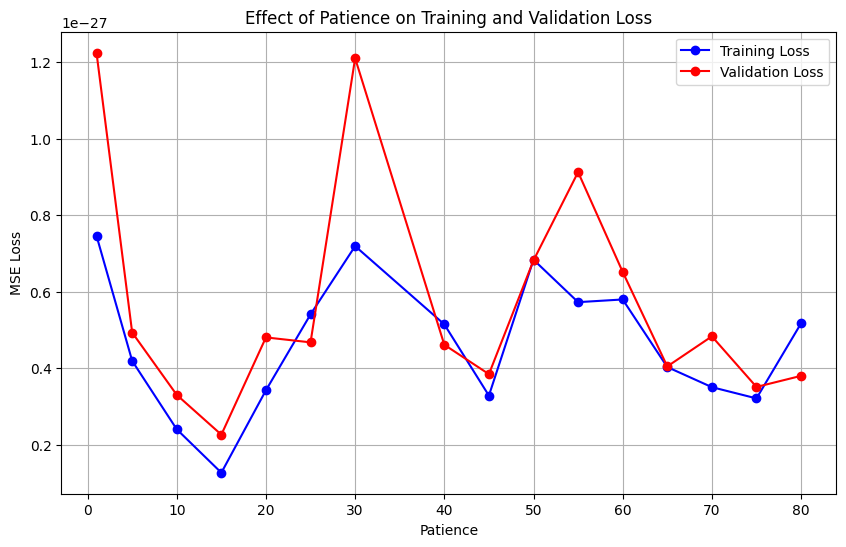

In [748]:
X_train_split, X_val, Y_train_split, Y_val = train_test_split(
  X_train, Y_train, test_size=0.2, random_state=42
)

patience_values = [1, 5, 10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80]
results = {}

for patience in patience_values:
  lin_nn = NeuralNetwork(X_train_split, Y_train_split, [2, 10, 1], 0.001)
  training_losses, validation_losses, last_y = lin_nn.gradient_descent(
    linear,
    linear_derivative,
    X_val=X_val,
    Y_val=Y_val,
    patience=patience
  )
  results[patience] = {
    'training_losses': training_losses,
    'validation_losses': validation_losses,
    'last_y': last_y
  }


final_train_losses = [results[p]['training_losses'][-1] for p in patience_values]
final_val_losses = [results[p]['validation_losses'][-1] for p in patience_values]

plt.figure(figsize=(10, 6))
plt.plot(patience_values, final_train_losses, 'b-o', label='Training Loss')
plt.plot(patience_values, final_val_losses, 'r-o', label='Validation Loss')
plt.xlabel('Patience')
plt.ylabel('MSE Loss')
plt.title('Effect of Patience on Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

**8a. How the training and validation loss changes as you change the “patience” in Early Stopping?**<br>
Answer: As patience increases, the training loss decreases more significantly. Low patience values stop training early, this causes both losses relatively high which is underfitting. With medium patience, validation loss reaches its minimum. With high patience, training loss continues to decrease while validation loss starts to increase, creating a widening gap between them. This happens because the model begins memorizing training data rather than learning generalizable patterns.
<br>
**8b. Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.**<br>
Answer: Above is the plot of the training vs validation loss curves. Looking at the final loss values, both training and validation losses are extremely small which indicates an excellent fit regardless of patience. There's no clear pattern of increasing gap between training and validation loss as patience increases. The fluctuations in the losses appear to be random rather than showing systematic overfitting with increased patience.

9) **Implement another regularization technique for NN as shown in the class. Compare and contrast with early stopping and your chosen regularization technique.**

In [749]:
early_lin_nn = NeuralNetwork(X_train_split, Y_train_split, [2, 10, 1], 0.001)
early_train_losses, early_val_losses, early_last_y = lin_nn.gradient_descent(
    linear,
    linear_derivative,
    X_val=X_val,
    Y_val=Y_val,
    patience=50
)

l2_lin_nn = NeuralNetwork(X_train_split, Y_train_split, [2, 10, 1], 0.001)
l2_train_losses, l2_val_losses, l2_last_y = lin_nn.gradient_descent(
    linear,
    linear_derivative,
    lambda_reg=0.1
)

X_test_pred_early = early_lin_nn.forward_pass_data(X_test, linear)[0]
Y_test_reshaped = Y_test.reshape(early_lin_nn.Y_train.shape[0], Y_test.shape[0])
early_test_mse = early_lin_nn.mse(Y_test_reshaped, X_test_pred_early)

X_test_pred_l2 = l2_lin_nn.forward_pass_data(X_test, linear)[0]
l2_test_mse = l2_lin_nn.mse(Y_test_reshaped, X_test_pred_l2)

print(f"Early stopping - Final training MSE: {early_train_losses[-1]}")
print(f"L2 regularization - Final training MSE: {l2_train_losses[-1]}")
print(f"Early stopping - Test MSE: {early_test_mse}")
print(f"L2 regularization - Test MSE: {l2_test_mse}")
print(f"Early stopping trained for {len(early_train_losses)} epochs")
print(f"L2 regularization trained for {len(l2_train_losses)} epochs")

Early stopping - Final training MSE: 5.172679592818748e-28
L2 regularization - Final training MSE: 0.0021320977140439003
Early stopping - Test MSE: 5570.2331044305765
L2 regularization - Test MSE: 5692.093722775018
Early stopping trained for 51 epochs
L2 regularization trained for 1000 epochs


**9 CONTINUED) Which one would you prefer for this dataset setting? Justify your answer.**<br>
Answer: The MSE calculation for early stopping and L2 regularization on the test data show that the MSE for both is about the same. However, the final training MSE for early stopping is extremely close to zero which means it is likely overfit. The L2 regularization training MSE is close to zero but it's value is much more reasonable. I will choose to use the L2 regularization technique because it will likely generalize better to unseen data.